# Lab 4
## Machine Learning

Lab 1 - 1st May – to be rescheduled on the 30th April from 16:00 to 18:00 in room 3.32

Lab 2 - 1st May – to be rescheduled on the 30th April from 18:00 to 20:00 in room 3.32

Lab 1 - 8th May - to be rescheduled on the 7th May from 16:00 to 18:00 in room 3.32

Lab 2 - 8th May - to be rescheduled on the 7th May from 18:00 to 20:00 in room 3.32

### Importing packages

As usual we begin by importing the necessary packages and functions.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix


## Student Performance Dataset <a class="anchor" id="dataset"></a>

We will once again be working with the student performance dataset this week. More information on the dataset can be found here: https://archive.ics.uci.edu/dataset/320/student+performance

In [50]:
data = pd.read_csv('student-mat.csv', sep=';')

Have a look at the data to remind yourself of the different variables.

In [51]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Test, Training, Validation Split

Use the same 60/20/20 split from last lab for training/validation/testing.

In [52]:
X = data.drop('G3', axis=1)
y = data['G3']

#Split the data here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 
#To make the validation set 20% of the original data we use test size 0.25 as 0.25*0.8=0.2

#### *One-hot encoding*
As a rule of thumb, the only thing that our models can take as input is columns of numbers. Luckily for us, we can convert almost every other type of data into such columns. In this case, we have quite a few nominal categorical variables, some of which are nominal and others are ordinal.

One-hot encoding is a method used to convert categorical variables into a numerical format suitable for machine learning models. Each unique category is represented as a binary vector, where only one element is 1 (indicating the unit is in that category) and the rest are 0. 

Below is a simple example demonstrating how to use OneHotEncoder() from sklearn.preprocessing to encode a list of animal types.

In [53]:
# Sample categorical data
animals = np.array([["Cat"], ["Dog"], ["Fish"], ["Dog"], ["Cat"]])

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Sparse output = True returns a sparse matrix, while False returns a 2D array

# Fit and transform the data
onehot_encoded = encoder.fit_transform(animals)

# Display results
print("Categories:", encoder.categories_)
print("One-hot encoded representation:\n", onehot_encoded)

Categories: [array(['Cat', 'Dog', 'Fish'], dtype='<U4')]
One-hot encoded representation:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


To get the idea, see if you can create an array of categorical variables such that the one-hot representation looks like:

\begin{bmatrix}
0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0
\end{bmatrix}


In [14]:
jobs = np.array(data["Mjob"]).reshape(-1, 1)

jobs_encoded = encoder.fit_transform(jobs)

print("Categories:", encoder.categories_)
print("Jobs encoded: \n", jobs_encoded)

Categories: [array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)]
Jobs encoded: 
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


Conceptually, **one-hot encoding is a decision we make**. We decide how to do it and which variables to apply it to. In Python, we cannot treat ordinal data as ordinal. We will either have to treat it as pseudo-linear (e.g. by encoding "bad", "medium", "good" as 1, 2 and 3) or as nominal (e.g. by one-hot encoding it).

#### Pre-processing Categorical and Numerical Variables

As we have a mix of nominal, ordinal and numerical data we don't want to apply the same transformations to all of them. We can use the ColumnTransformer class to apply the appropriate transformations to each column. Usually we only one-hot encode nominal variables and not ordinal variables as otherwise we could lose information about the ordering. But this is not always the case, sometimes if the distinct categories are more important than the order we might choose to one-hot encode this data also. 

I would like you to have a look at the data and decide which data we will one-hot encode, which we will call 'one_hot_features', and which we will normalise 'normalise_features'.

All variables:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']

In [54]:
categorical_features = ['school', 'sex','address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
                        'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
                        'internet', 'romantic']
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 
                      'goout', 'Dalc', 'Walc', 'health', 'absences']

Now we create the preprocessor and then use it as we would any other transformation, with fit_transform() and transform().

In [55]:
# Preprocessors for numerical and categorical data
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output= False), categorical_features)
])

#Use the preprocessor to transform the data
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

# Ridge Regression

Ridge regression is similar to linear regression but adds a penalty, called the L2 penalty to the loss function, which discourages large coefficients by penalizing their squared magnitudes. This helps reduce overfitting and multicollinearity by shrinking coefficients toward zero, but it does not set any of them exactly to zero, meaning all features are retained.

Now let's get on to fitting the models we learned in class. As you'll notice now that we are done with manual implementation the code is much more compact. This is more what our model fitting will often look like. I would recommend you make sure you understand what each line does.

In [56]:
#Fit a Ridge Regression model
ridge = Ridge(alpha=1) #alpha is our lambda-parameter
ridge.fit(X_train, y_train)

#Predictions
y_train_pred = ridge.predict(X_train)
y_val_pred = ridge.predict(X_val)

#Mean Squared Error
train_mse = np.mean((y_train - y_train_pred)**2)
val_mse = np.mean((y_val - y_val_pred)**2)
print(f"Train MSE: {train_mse}")
print(f"Validation MSE: {val_mse}")

Train MSE: 14.983696968326504
Validation MSE: 18.13874230753257


In scikit learn, the lambda of ridge regression is referred to as alpha. Above we defaulted to one as the alpha parameter, which is the default for the Ridge() function. It might not always be the best value however. To find the optimal alpha value we can use our validation set.

We want to define a Range of possible Alpha Values to consider. Try to see what np.linspace(0,4,20) and np.logspace(-4, 4, 20) do. Which do you think is more appropriate?

In [57]:
alphas = np.logspace(-4, 4, 20)
print(alphas)

alphas2 = np.linspace(0, 4, 20)
print(alphas2)

[1.00000000e-04 2.63665090e-04 6.95192796e-04 1.83298071e-03
 4.83293024e-03 1.27427499e-02 3.35981829e-02 8.85866790e-02
 2.33572147e-01 6.15848211e-01 1.62377674e+00 4.28133240e+00
 1.12883789e+01 2.97635144e+01 7.84759970e+01 2.06913808e+02
 5.45559478e+02 1.43844989e+03 3.79269019e+03 1.00000000e+04]
[0.         0.21052632 0.42105263 0.63157895 0.84210526 1.05263158
 1.26315789 1.47368421 1.68421053 1.89473684 2.10526316 2.31578947
 2.52631579 2.73684211 2.94736842 3.15789474 3.36842105 3.57894737
 3.78947368 4.        ]


The logspace in general is more appropriate for ridge, and quite a few other hyperparameters we work with as scaling the order of magnitude is often more appropriate than scaling linearly. Often the question of what range to use for hyperparameters is an empirical one, which you will build up an intuition for over time, and can also be supplemented by seeing what others have used for similar models.

Now we want to fit a ridge regression for each of our alpha values. For each value you should fit the model, predict the y values from the validation set and record the MSE and alpha.

Hint: Initialize lists of alpha values and mse values outside the loop to store results.

In [73]:
alpha_values = alphas

val_mse_list = []


for value in alpha_values:
    model = Ridge(alpha=value)
    model.fit(X_train, y_train)

    #Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_pred = model.predict(X_val)

    #Mean Squared Error
    val_mse = mean_squared_error(y_val, y_pred)  # Calculate MSE
    val_mse_list.append(val_mse)

Use np.argmin on your mse values to find the alpha value that results in the lowest MSE.

In [74]:
best_alpha = np.argmin(train_mse_list)#gives me the INDEX-value of the lowest value, not the actual lowest value
print(best_alpha)

val_mse_list[14]

14


15.493293529278853

Plot MSE vs. Alpha
Create a plot to visualize how MSE changes with different alpha values.

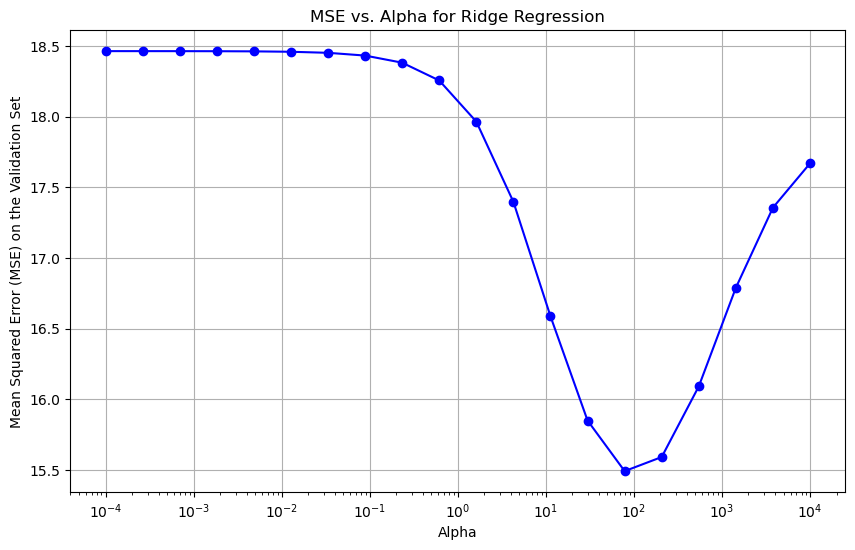

In [ ]:
plt.figure(figsize=(10, 6))
plt.semilogx(alpha_values, val_mse_list, marker='o', linestyle='-', color='b')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE) on the Validation Set')
plt.title('MSE vs. Alpha for Ridge Regression')
plt.grid(True)
plt.show()

To calculate the final Mean Squared Error (MSE) on the test set using the best alpha value identified from the validation set, we follow the steps ahead. This will give us an estimate of how well your Ridge Regression model is expected to perform on unseen data.

Combine Training and Validation Sets
For the final model, you'll use both the training and validation data to train it, maximizing the amount of data the model can learn from.

In [69]:
# Combine the training and validation sets
X_train_val = np.vstack((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

Using the best alpha value found, train the Ridge Regression model on the combined training and validation data.

In [75]:
model = Ridge(alpha=val_mse_list[best_alpha])

model.fit(X_train_val, y_train_val)


Ridge(alpha=15.493293529278853)

Finally, predict on the test set using the final model and calculate the Mean Squared Error.

In [76]:

#Predictions
y_test_pred = model.predict(X_test)

#Mean Squared Error
test_mse = mean_squared_error(y_test, y_test_pred)  # Calculate MSE

print(test_mse)

17.42464145527275


What do you conclude from training and test mse?

### Lasso Regression:

Now we move on to Lasso Regression. We use the Lasso(alpha=alpha) function from sklearn to fit lasso regressions. See if you can do the same proceedure as above with Lasso this time. I have given some indications above each block what they shoud do.

Initialize lists to store alpha values and their corresponding MSEs. Then, loop over the alpha values, fit a Lasso model for each, and evaluate its performance on the validation set.

Plot MSE vs. Alpha

Visualize how the Mean Squared Error changes with different alpha values.

Print the Best Alpha and Its MSE
Output the best alpha value found and its corresponding lowest MSE.

 Combine the training and validation sets for the final model training and fit the model on the combined training and validation data.

Bonus: Have a look at how many coefficients are non-zero in your Lasso model compared to the ridge model.

# LDA and Classification

Finally let's fit an LDA model, but as this model is a classifier we need to first transform our label y to be classes. In this case we can use the pass rate to create two categories, making our task to predict if students will pass or fail. We also restrict ourselves to just the previouse test scores for the purposes of easier visualisation later on.

In [ ]:
#transform the target to be pass or fail
y_LDA = np.where(y > 10, 1, 0)
X_LDA = data[['G1', 'G2']]

#Now we split the data into training and testing sets
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X_LDA, y_LDA, test_size=0.2, random_state=42)

We implement LDA using the LinearDiscriminantAnalysis() function. For the most part the proceedure is the same as fitting a Ridge model above, except with our changed datasets and with accuracy istead of MSE as we are fitting a classification problem.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Implement LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_LDA, y_train_LDA)

# Predictions
y_train_pred = lda.predict(X_train_LDA)
y_test_pred = lda.predict(X_test_LDA)

# Accuracy
train_accuracy = accuracy_score(y_train_LDA, y_train_pred)
test_accuracy = accuracy_score(y_test_LDA, y_test_pred)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

To show the same intuition as we saw in class I have plotted the decision boundary below. As we can see the decision boundary is linear as LDA gives Gaussian priors with equal variance. 

In [ ]:
# Create a mesh grid for the two features
x_min, x_max = X_LDA.iloc[:, 0].min() - 1, X_LDA.iloc[:, 0].max() + 1
y_min, y_max = X_LDA.iloc[:, 1].min() - 1, X_LDA.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the value of the mesh grid
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_LDA.iloc[:, 0], X_LDA.iloc[:, 1], c=y_LDA, edgecolors='k', s=20)
plt.xlabel('G1')
plt.ylabel('G2')
plt.title('LDA Decision Boundary')
plt.show()

Bonus: Now implement a Logistic Regression and plot the decision boundary for it and compare both.